# **DATA PREPROCESSING**

**Install kaggle, split folders, and python resize image**

In [1]:
!pip install kaggle
!pip install split-folders
!pip install python-resize-image

**Import files Kaggle.json**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dinishari","key":"2ec26368dca556aa057a43f49e679b30"}'}

**Set up Kaggle API**

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

**Import Libraries**

In [4]:
import os
from IPython.display import Image
from PIL import Image as PILImage
from resizeimage import resizeimage
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import splitfolders

**Download Datasets from Kaggle**

In [5]:
#Download Dataset 1
!kaggle datasets download -d trolukovich/food11-image-dataset

#Download Dataset 2
!kaggle datasets download -d theresalusiana/indonesian-food

# Download Dataset 3:
!kaggle datasets download -d kmader/food41

 98% 1.07G/1.08G [00:12<00:00, 186MB/s]
100% 1.08G/1.08G [00:12<00:00, 94.8MB/s]
 99% 665M/673M [00:07<00:00, 61.3MB/s]
100% 673M/673M [00:07<00:00, 95.0MB/s]
100% 5.28G/5.30G [00:52<00:00, 87.0MB/s]
100% 5.30G/5.30G [00:52<00:00, 108MB/s] 


**Create Directories**

In [6]:
#Create directory named dataset
!mkdir dataset

#Create a train directory in dataset for data training
!mkdir dataset/train

#Create a dev directory in dataset for data validation
!mkdir dataset/dev

#Create a test directory in dataset for data testing
!mkdir dataset/test

### **Dataset 1**

**Extracting Dataset Into Training Data, Validation Data, and Testing Data**


In [ ]:
#Extract Training Set
!unzip -j -q food11-image-dataset.zip "training/Egg/*" -d "dataset/train/egg"
!unzip -j -q food11-image-dataset.zip "training/Soup/*" -d "dataset/train/soup"

#Extract Validation Set
!unzip -j -q food11-image-dataset.zip "validation/Egg/*" -d "dataset/dev/egg"
!unzip -j -q food11-image-dataset.zip "validation/Soup/*" -d "dataset/dev/soup"

#Extract Testing Set
!unzip -j -q food11-image-dataset.zip "evaluation/Egg/*" -d "dataset/test/egg"
!unzip -j -q food11-image-dataset.zip "evaluation/Soup/*" -d "dataset/test/soup"

**Save 700 Datasets for Training Set, 150 for Dev Set, and 150 for Test Set and Delete the Rest**

In [9]:
#Save 700 First Images for Training Set
!ls -d dataset/train/egg/* | tail -n +701 | xargs -I {} rm "{}"
!ls -d dataset/train/soup/* | tail -n +701 | xargs -I {} rm "{}"

#Save 150 First Images for Validation Set
!ls -d dataset/dev/egg/* | tail -n +151 | xargs -I {} rm "{}"
!ls -d dataset/dev/soup/* | tail -n +151 | xargs -I {} rm "{}"

#Save 150 First Images for Testing Set
!ls -d dataset/test/egg/* | tail -n +151 | xargs -I {} rm "{}"
!ls -d dataset/test/soup/* | tail -n +151 | xargs -I {} rm "{}"

**Check the Total of Datasets in Each Class**

In [10]:
#Check the Total of Dataset for Training Set
!find dataset/train/egg/ -type f | wc -l
!find dataset/train/soup/ -type f | wc -l

#Check the Total of Dataset for Validation Set
!find dataset/dev/egg/ -type f | wc -l
!find dataset/dev/soup/ -type f | wc -l

#Check the Total of Dataset for Testing Set
!find dataset/test/egg/ -type f | wc -l
!find dataset/test/soup/ -type f | wc -l

700
700
150
150
150
150


### **DATASET 2**

**Extracting Dataset Into Training Data, Validation Data, and Testing Data**

In [11]:
#Extract Training Set
!unzip -j -q indonesian-food.zip "dataset/train/bakso/*" -d "dataset/train/bakso"
!unzip -j -q indonesian-food.zip "dataset/train/gado/*" -d "dataset/train/gado"
!unzip -j -q indonesian-food.zip "dataset/train/rendang/*" -d "dataset/train/rendang"
!unzip -j -q indonesian-food.zip "dataset/train/sate/*" -d "dataset/train/sate"

#Extract Validation Set
!unzip -j -q indonesian-food.zip "dataset/valid/bakso/*" -d "dataset/dev/bakso"
!unzip -j -q indonesian-food.zip "dataset/valid/gado/*" -d "dataset/dev/gado"
!unzip -j -q indonesian-food.zip "dataset/valid/rendang/*" -d "dataset/dev/rendang"
!unzip -j -q indonesian-food.zip "dataset/valid/sate/*" -d "dataset/dev/sate"

#Extract Testing Set
!unzip -j -q indonesian-food.zip "dataset/test/bakso/*" -d "dataset/test/bakso"
!unzip -j -q indonesian-food.zip "dataset/test/gado/*" -d "dataset/test/gado"
!unzip -j -q indonesian-food.zip "dataset/test/rendang/*" -d "dataset/test/rendang"
!unzip -j -q indonesian-food.zip "dataset/test/sate/*" -d "dataset/test/sate"

**Remove Name Spaces in Dataset**

In [12]:
#Remove Name Spaces for gado-gado Dataset
!for file in dataset/train/gado/*; do mv "$file" "${file// /_}"; done
!for file in dataset/dev/gado/*; do mv "$file" "${file// /_}"; done
!for file in dataset/test/gado/*; do mv "$file" "${file// /_}"; done

**Save 700 Datasets for Training Set, 150 for Dev Set, and 150 for Test Set and Delete the Rest**

In [13]:
#Save 700 First Images for Training Set
!ls -d dataset/train/bakso/* | tail -n +701 | xargs -I {} rm "{}"
!ls -d dataset/train/gado/* | tail -n +701 | xargs -I {} rm "{}"
!ls -d dataset/train/rendang/* | tail -n +701 | xargs -I {} rm "{}"
!ls -d dataset/train/sate/* | tail -n +701 | xargs -I {} rm "{}"

#Save 150 First Images for Validation Set
!ls -d dataset/dev/bakso/* | tail -n +151 | xargs -I {} rm "{}"
!ls -d dataset/dev/gado/* | tail -n +151 | xargs -I {} rm "{}"
!ls -d dataset/dev/rendang/* | tail -n +151 | xargs -I {} rm "{}"
!ls -d dataset/dev/sate/* | tail -n +151 | xargs -I {} rm "{}"

#Save 150 First Images for Testing Set
!ls -d dataset/test/bakso/* | tail -n +151 | xargs -I {} rm "{}"
!ls -d dataset/test/gado/* | tail -n +151 | xargs -I {} rm "{}"
!ls -d dataset/test/rendang/* | tail -n +151 | xargs -I {} rm "{}"
!ls -d dataset/test/sate/* | tail -n +151 | xargs -I {} rm "{}"

**Check the Total of Datasets in Each Class**

In [14]:
#Check the Total of Dataset for Training Set
!find dataset/train/bakso/ -type f | wc -l
!find dataset/train/gado/ -type f | wc -l
!find dataset/train/rendang/ -type f | wc -l
!find dataset/train/sate/ -type f | wc -l

#Check the Total of Dataset for Validation Set
!find dataset/dev/bakso/ -type f | wc -l
!find dataset/dev/gado/ -type f | wc -l
!find dataset/dev/rendang/ -type f | wc -l
!find dataset/dev/sate/ -type f | wc -l

#Check the Total of Dataset for Testing Set
!find dataset/test/bakso/ -type f | wc -l
!find dataset/test/gado/ -type f | wc -l
!find dataset/test/rendang/ -type f | wc -l
!find dataset/test/sate/ -type f | wc -l

700
700
700
700
150
150
150
150
150
150
150
150


### **DATASET 3**

**Create a Temporary Directory to Hold the Data**

In [15]:
!mkdir temp_dataset

**Extracting Dataset In Temporary Dataset**

In [16]:
!unzip -j -q food41.zip "images/cheesecake/*" -d "temp_dataset/cheesecake"
!unzip -j -q food41.zip "images/churros/*" -d "temp_dataset/churros"
!unzip -j -q food41.zip "images/cup_cakes/*" -d "temp_dataset/cup_cakes"
!unzip -j -q food41.zip "images/donuts/*" -d "temp_dataset/donuts"
!unzip -j -q food41.zip "images/french_fries/*" -d "temp_dataset/french_fries"
!unzip -j -q food41.zip "images/fried_rice/*" -d "temp_dataset/fried_rice"
!unzip -j -q food41.zip "images/hamburger/*" -d "temp_dataset/hamburger"
!unzip -j -q food41.zip "images/hot_dog/*" -d "temp_dataset/hot_dog"
!unzip -j -q food41.zip "images/ice_cream/*" -d "temp_dataset/ice_cream"
!unzip -j -q food41.zip "images/pancakes/*" -d "temp_dataset/pancakes"
!unzip -j -q food41.zip "images/pizza/*" -d "temp_dataset/pizza"
!unzip -j -q food41.zip "images/greek_salad/*" -d "temp_dataset/salad"
!unzip -j -q food41.zip "images/spaghetti_bolognese/*" -d "temp_dataset/spaghetti_bolognese"
!unzip -j -q food41.zip "images/waffles/*" -d "temp_dataset/waffles"

**Splitting data 150 each for dev and test, the rest will be used as training data**

In [17]:
splitfolders.fixed("temp_dataset", output="temp_folder", seed=42, fixed=(150, 150))

Copying files: 14000 files [00:06, 2204.31 files/s]


**Move the dataset from temp folder to dataset folder**

In [18]:
#Move dataset in the temp_folder/train to the dataset/train
!mv temp_folder/train/* dataset/train/

#Move dataset in the temp_folder/val to the dataset/dev
!mv temp_folder/val/* dataset/dev/

#Move dataset in the temp_folder/test to the dataset/test
!mv temp_folder/test/* dataset/test/

**Remove Temporary Folder and Temporary Dataset Folder**

In [19]:
#Remove the temp_folder
!rm -rf temp_folder

#Remove the temp_dataset
!rm -rf temp_dataset

**Check the Total of Datasets in Each Class**

In [27]:
#Check the Total of Dataset for Training Set
!find dataset/train/cheesecake/ -type f | wc -l
!find dataset/train/churros/ -type f | wc -l
!find dataset/train/cup_cakes/ -type f | wc -l
!find dataset/train/donuts/ -type f | wc -l
!find dataset/train/french_fries/ -type f | wc -l
!find dataset/train/fried_rice/ -type f | wc -l
!find dataset/train/hamburger/ -type f | wc -l
!find dataset/train/hot_dog/ -type f | wc -l
!find dataset/train/ice_cream/ -type f | wc -l
!find dataset/train/pancakes/ -type f | wc -l
!find dataset/train/pizza/ -type f | wc -l
!find dataset/train/salad/ -type f | wc -l
!find dataset/train/spaghetti_bolognese/ -type f | wc -l
!find dataset/train/waffles/ -type f | wc -l

#Check the Total of Dataset for Validation Set
!find dataset/dev/cheesecake/ -type f | wc -l
!find dataset/dev/churros/ -type f | wc -l
!find dataset/dev/cup_cakes/ -type f | wc -l
!find dataset/dev/donuts/ -type f | wc -l
!find dataset/dev/french_fries/ -type f | wc -l
!find dataset/dev/fried_rice/ -type f | wc -l
!find dataset/dev/hamburger/ -type f | wc -l
!find dataset/dev/hot_dog/ -type f | wc -l
!find dataset/dev/ice_cream/ -type f | wc -l
!find dataset/dev/pancakes/ -type f | wc -l
!find dataset/dev/pizza/ -type f | wc -l
!find dataset/dev/salad/ -type f | wc -l
!find dataset/dev/spaghetti_bolognese/ -type f | wc -l
!find dataset/dev/waffles/ -type f | wc -l

#Check the Total of Dataset for Testing Set
!find dataset/test/cheesecake/ -type f | wc -l
!find dataset/test/churros/ -type f | wc -l
!find dataset/test/cup_cakes/ -type f | wc -l
!find dataset/test/donuts/ -type f | wc -l
!find dataset/test/french_fries/ -type f | wc -l
!find dataset/test/fried_rice/ -type f | wc -l
!find dataset/test/hamburger/ -type f | wc -l
!find dataset/test/hot_dog/ -type f | wc -l
!find dataset/test/ice_cream/ -type f | wc -l
!find dataset/test/pancakes/ -type f | wc -l
!find dataset/test/pizza/ -type f | wc -l
!find dataset/test/salad/ -type f | wc -l
!find dataset/test/spaghetti_bolognese/ -type f | wc -l
!find dataset/test/waffles/ -type f | wc -l

700
700
700
700
700
700
700
700
700
700
700
700
700
700
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150


## **Show Random Images**

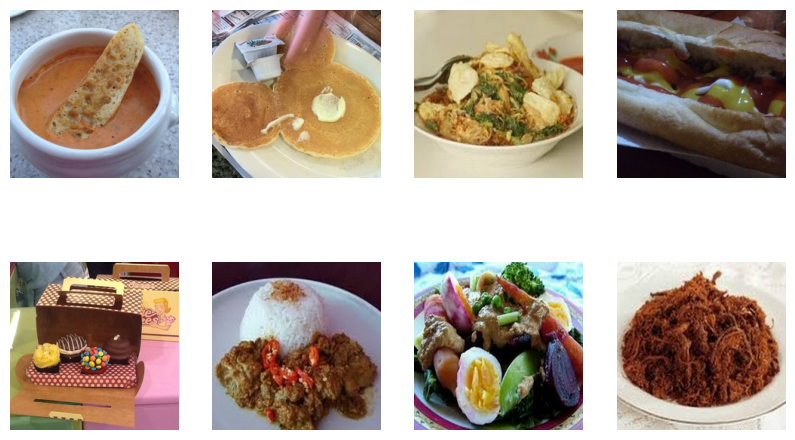

In [28]:
def show_random_images_from(glob_path, seed):
    if seed:
        random.seed(seed)
    r = random.sample(glob(glob_path), 8)
    plt.figure(figsize=(10, 6))
    for i, k in enumerate(r):
        plt.subplot(241 + i)

        # Load dan resize images into (224 x 224)
        image = PILImage.open(k)
        resized_image = resizeimage.resize_cover(image, [224, 224])

        plt.imshow(resized_image)
        plt.axis('off')

# Setelah Resize
show_random_images_from("dataset/*/*/*", seed=330)
plt.show()


## **Save Dataset to Google Drive**

**Zip the Dataset Folder**

In [22]:
!zip -r -q dataset.zip "/content/dataset/"

**Connect Google Colab with Google Drive**

In [23]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


**Copy the Dataset to Google Drive**

In [24]:
!cp -r "dataset.zip" "drive/MyDrive/CalorieCare/Datasets/"

**Check the Dataset**

In [25]:
!ls "drive/MyDrive/CalorieCare/Datasets/"

dataset.zip


**Flush Data and Unmount**

In [26]:
drive.flush_and_unmount()